<a href="https://colab.research.google.com/github/sukjin1/ed/blob/main/computation_stability_from_logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.cnblogs.com/presleyren/p/17258611.html

In [22]:
from sklearn.datasets import make_blobs

# 2000개의 데이터를 생성 (4개의 class를 가짐)
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]] #4개 클래스의 중심점
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)


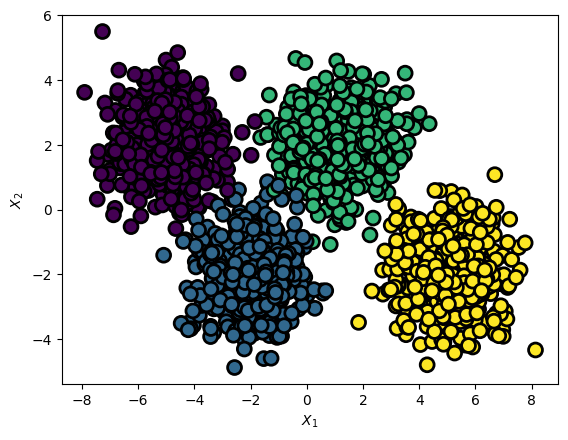

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [26]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
import logging
tf.autograph.set_verbosity(0)

# 소프트 맥스 회귀

model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),     #  Adam algorithm can auto find  best learning rate
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.2086
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6165
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2882
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1343
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0869
Epoch 6/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0682
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0584
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0452


In [28]:
import numpy as np
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[2.0554231e-03 6.5215485e-04 9.5583642e-01 4.1455999e-02]
 [9.9348491e-01 6.4138300e-03 9.5667230e-05 5.5229007e-06]]
largest value 0.9999965 smallest value 1.04411875e-10


In [31]:
preferred_model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),       #  Adam algorithm can auto find  best learning rate, it is more faste; rate=0.001
 )
preferred_model.fit( X_train,y_train, epochs=10 )

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.0330
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4445
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2219
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1269
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0906
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0473


In [32]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n{p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
[[-2.9549363 -2.9453187  3.1725903 -0.301124 ]
 [ 2.9423192 -2.454614  -3.977972  -7.687304 ]]
largest value 12.885661 smallest value -11.101687


In [33]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n{sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
[[2.1073981e-03 2.1277636e-03 9.6582276e-01 2.9942116e-02]
 [9.9448836e-01 4.5054839e-03 9.8209956e-04 2.4055420e-05]]
largest value 0.9999992 smallest value 1.9459626e-10


In [34]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.9549363 -2.9453187  3.1725903 -0.301124 ], category: 2
[ 2.9423192 -2.454614  -3.977972  -7.687304 ], category: 0
[ 2.0365565 -1.4750122 -3.4648488 -6.2965508], category: 0
[-2.070289   3.695994  -4.158908  -3.9553788], category: 1
[-2.3647163 -5.37424    2.5831146 -3.9218204], category: 2


In [35]:
for z in [500,600,700,800]:
    ez = np.exp(z)
    zs = "{" + f"{z}" + "}"
    print(f"e^{zs} = {ez:0.2e}")

e^{500} = 1.40e+217
e^{600} = 3.77e+260
e^{700} = 1.01e+304
e^{800} = inf


<ipython-input-35-4e6d459f845b>:2: RuntimeWarning: overflow encountered in exp
  ez = np.exp(z)


In [42]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)
z_tmp = np.array([500.,600,700,800])

def my_softmax_ns(z):
    """numerically stablility improved"""
    bigz = np.max(z)
    ez = np.exp(z-bigz)              # minimize exponent
    sm = ez/np.sum(ez)
    return(sm)

print(tf.nn.softmax(z_tmp).numpy(), "\n", my_softmax_ns(z_tmp), "\n", "my_softmax\n",my_softmax(z_tmp) )

[5.14820022e-131 1.38389653e-087 3.72007598e-044 1.00000000e+000] 
 [5.14820022e-131 1.38389653e-087 3.72007598e-044 1.00000000e+000] 
 my_softmax
 [ 0.  0.  0. nan]


<ipython-input-42-e9fa31d8d486>:2: RuntimeWarning: overflow encountered in exp
  ez = np.exp(z)              #element-wise exponenial
<ipython-input-42-e9fa31d8d486>:3: RuntimeWarning: invalid value encountered in true_divide
  sm = ez/np.sum(ez)


my_softmax [ 0.  0.  0. nan], 값이 정확하지 않고 마지막 값은 오버 플로우

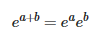

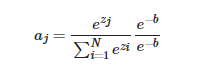

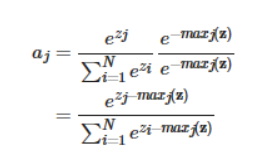

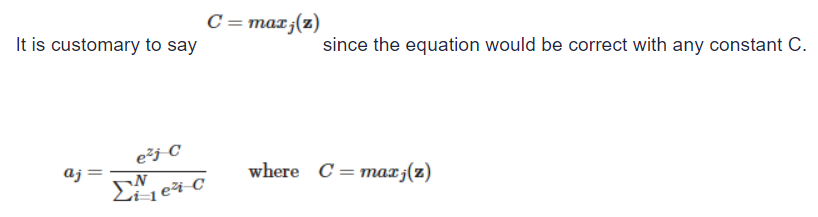

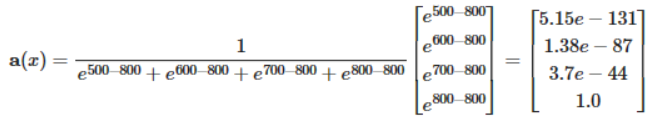

e의 차수값을 줄여서(z의 최대값을 빼주는 방식)  오버플로우를 방지

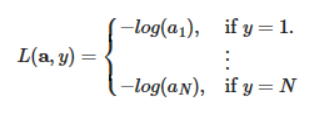

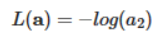

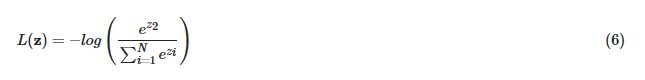

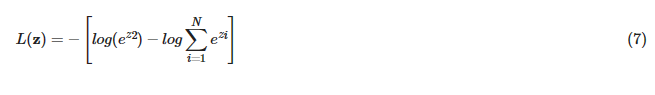

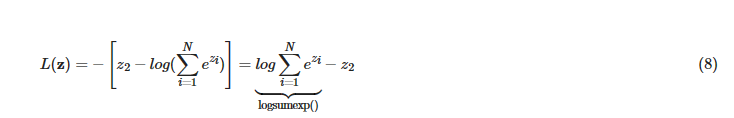

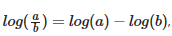

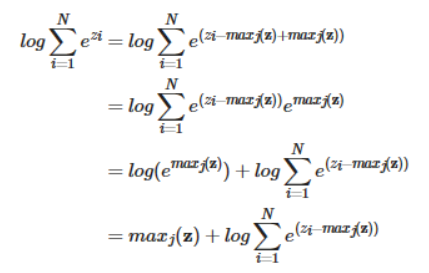

비슷한 방법으로 미치 소프트 맥스값을 계산하지 않고 loss값을 구할 때 loss를 구하는 식과 소프트 맥스 값을 구하는 식을 결합하여 오버플로우가 덜 나도록 계산